# Keras Tutorial: Deep Learning in Python
- Question: Can you predict whether a wine is red or white by looking at its chemical properties, such as volatile acidity or sulphates?
https://www.datacamp.com/community/tutorials/deep-learning-python?utm_source=adwords_ppc&utm_campaignid=1658343521&utm_adgroupid=63833880615&utm_device=c&utm_keyword=keras&utm_matchtype=p&utm_network=g&utm_adpostion=&utm_creative=319519154328&utm_targetid=aud-299261629654:kwd-295071417107&utm_loc_interest_ms=&utm_loc_physical_ms=9016565&gclid=CjwKCAiAxp-ABhALEiwAXm6IyQJo6LA_Z4HlQUiBhrfFwOFL3Vu0bDTjMI53og6hcZfeWIkzEZRBTxoCzbkQAvD_BwE

# Loading the Data
- This can be easily done with the Python data manipulation library Pandas. You follow the import convention and import the package under its alias, pd.
- Next, you make use of the read_csv() function to read in the CSV files in which the data is stored. Additionally, use the sep argument to specify that the separator, in this case, is a semicolon and not a regular comma.

In [1]:
# Import pandas 
import pandas as pd

# Read in white wine data 
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')

# Read in red wine data 
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

# Data Exploration

In [2]:
# Print info on white wine
print(white.info())

# Print info on red wine
print(red.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column   

Check whether your import was successful:
- Does the data contain all the variables that the data description file of the UCI Machine Learning Repository promised you?
- Besides the number of variables, also check the quality of the import: are the data types correct? 
- Did all the rows come through? 
- Are there any null values that you should take into account when you’re cleaning up the data?

In [3]:
# First rows of `red` 
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Take a sample of 5 rows of `red`
red.sample(5)



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1268,6.9,0.41,0.31,2.0,0.079,21.0,51.0,0.99668,3.47,0.55,9.5,6
87,7.7,0.49,0.26,1.9,0.062,9.0,31.0,0.99660,3.39,0.64,9.6,5
167,7.3,0.55,0.03,1.6,0.072,17.0,42.0,0.99560,3.37,0.48,9.0,4
373,7.4,0.55,0.22,2.2,0.106,12.0,72.0,0.99590,3.05,0.63,9.2,5
951,8.3,0.28,0.48,2.1,0.093,6.0,12.0,0.99408,3.26,0.62,12.4,7


- describe() offers some summary statistics about your data that can help you to assess your data quality. You see that some of the variables have a lot of difference in their min and max values. 



In [5]:
# Describe `white`
white.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


- Lastly, you have double checked the presence of null values in red with the help of isnull(). This is a function that always can come in handy when you’re still in doubt after having read the results of info()

In [6]:
# Double check for null values in `red`
pd.isnull(red)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


## Visualizing Variable: Alcohol

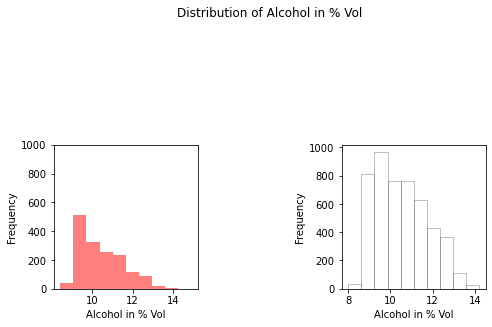

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2)

ax[0].hist(red.alcohol, 10, facecolor='red', alpha=0.5, label="Red wine")
ax[1].hist(white.alcohol, 10, facecolor='white', ec="black", lw=0.5, alpha=0.5, label="White wine")

fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=1)
ax[0].set_ylim([0, 1000])
ax[0].set_xlabel("Alcohol in % Vol")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("Alcohol in % Vol")
ax[1].set_ylabel("Frequency")
#ax[0].legend(loc='best')
#ax[1].legend(loc='best')
fig.suptitle("Distribution of Alcohol in % Vol")

plt.show()

In [8]:
# Double check with histogram() from numpy for white and red data
import numpy as np
print(np.histogram(red.alcohol, bins=[7,8,9,10,11,12,13,14,15]))
print(np.histogram(white.alcohol, bins=[7,8,9,10,11,12,13,14,15]))

(array([  0,   7, 673, 452, 305, 133,  21,   8]), array([ 7,  8,  9, 10, 11, 12, 13, 14, 15]))
(array([   0,  317, 1606, 1256,  906,  675,  131,    7]), array([ 7,  8,  9, 10, 11, 12, 13, 14, 15]))


## Visualizing Variable: Sulfates
- Relation between sulfates and quality of wine

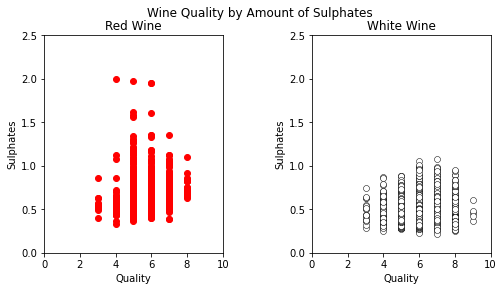

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].scatter(red['quality'], red["sulphates"], color="red")
ax[1].scatter(white['quality'], white['sulphates'], color="white", edgecolors="black", lw=0.5)

ax[0].set_title("Red Wine")
ax[1].set_title("White Wine")
ax[0].set_xlabel("Quality")
ax[1].set_xlabel("Quality")
ax[0].set_ylabel("Sulphates")
ax[1].set_ylabel("Sulphates")
ax[0].set_xlim([0,10])
ax[1].set_xlim([0,10])
ax[0].set_ylim([0,2.5])
ax[1].set_ylim([0,2.5])
fig.subplots_adjust(wspace=0.5)
fig.suptitle("Wine Quality by Amount of Sulphates")

plt.show()

Interpretation:
- Red wine seems to contain more sulfates than the white wine, which has fewer sulfates above 1 g/dm3
- For the white wine, there only seem to be a couple of exceptions that fall just above 1 g/dm3, while this is definitely more for the red wines. - This could maybe explain the general saying that red wine causes headaches, but what about the quality?

- You can clearly see that there is white wine with a relatively low amount of sulfates that gets a score of 9, but for the rest, it’s difficult to interpret the data correctly at this point.

## Visualizing Variable Acidity: Realtion with quality

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

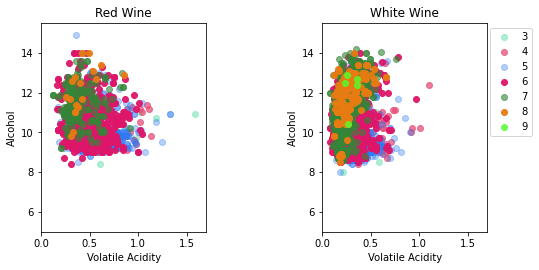

In [10]:
# Scatter plot that plots the alcohol versus the volatile acidity. 
# The data points should be colored according to their rating or quality label
np.random.seed(570) # colors chosen randomly with random module

redlabels = np.unique(red['quality'])
whitelabels = np.unique(white['quality'])

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
redcolors = np.random.rand(6,4)
whitecolors = np.append(redcolors, np.random.rand(1,4), axis=0)

for i in range(len(redcolors)):
    redy = red['alcohol'][red.quality == redlabels[i]]
    redx = red['volatile acidity'][red.quality == redlabels[i]]
    ax[0].scatter(redx, redy, c=redcolors[i])
for i in range(len(whitecolors)):
    whitey = white['alcohol'][white.quality == whitelabels[i]]
    whitex = white['volatile acidity'][white.quality == whitelabels[i]]
    ax[1].scatter(whitex, whitey, c=whitecolors[i])
    
ax[0].set_title("Red Wine")
ax[1].set_title("White Wine")
ax[0].set_xlim([0,1.7])
ax[1].set_xlim([0,1.7])
ax[0].set_ylim([5,15.5])
ax[1].set_ylim([5,15.5])
ax[0].set_xlabel("Volatile Acidity")
ax[0].set_ylabel("Alcohol")
ax[1].set_xlabel("Volatile Acidity")
ax[1].set_ylabel("Alcohol") 
#ax[0].legend(redlabels, loc='best', bbox_to_anchor=(1.3, 1))
ax[1].legend(whitelabels, loc='best', bbox_to_anchor=(1.3, 1))
#fig.suptitle("Alcohol - Volatile Acidity")
fig.subplots_adjust(top=0.85, wspace=0.7)

plt.show()

Interpretation:
- Most wines with label 8 have volatile acidity levels of 0.5 or below, but whether or not it has an effect on the quality is too difficult to say, since all the data points are very densely packed towards one side of the graph.

# Preprocess Data
- Looked at red and white wine seperately, want to classify entries based on their variables into red or white wine

In [11]:
# Add `type` column to `red` with value 1
red['type'] = 1

# Add `type` column to `white` with value 0
white['type'] = 0

# Append `white` to `red`
wines = red.append(white, ignore_index=True) # set to true because dont want to keep index labels of white when appending data to red

## Intermezzo: Correlation Matrix


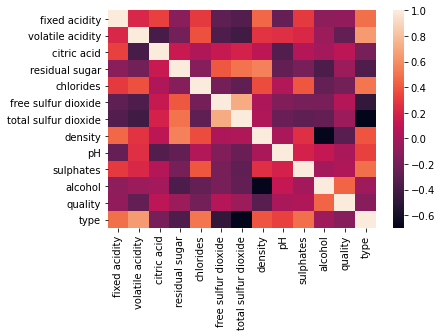

In [12]:
# Plot correlation matrix
import seaborn as sns
corr = wines.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

Interpretation
- Some variables that correlate, such as density and residual sugar.
- Also volatile acidity and type are more closely connected than you originally could have guessed by looking at the two data sets separately, and it was kind of to be expected that free sulfur dioxide and total sulfur dioxide were going to correlate.

## Train and Test Sets
- Imbalanced data refers to problem with classification where classes are not represented equally
- Need to be somewhat equal so that you dont value one more than the other
- Afterwards, you can evaluate the model and if it underperforms, you can resort to undersampling or oversampling to cover up the difference in observations.

In [13]:
# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split

# Specify the data 
X = wines.iloc[:,0:11] #.iloc for positional indexing and .loc for values of index

# Specify the target labels and flatten the array
y = np.ravel(wines.type)

# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Standardize the Data
- Deal with values that lie so far apart

In [14]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

## Model Data
- Binary classification as have only two classes
- Looking to build a fairly simple stack of fully-connected layers to solve this problem with relu activation function
- Build multi-layer perceptron
    - Keras Sequential model: it’s a linear stack of layers (model = Sequential())
    - The model needs to know what input shape to expect and that’s why you’ll always find the input_shape, input_dim, input_length, or batch_size arguments in the documentation of the layers and in practical examples of those layers.
    - Dense layer, which is a fully connected layer.
    - Without the activation function, your Dense layer would consist only of two linear operations: a dot product and an addition.

In [15]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(12, activation='relu', input_shape=(11,)))

# Add one hidden layer 
model.add(Dense(8, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

- Two key architecture decisions
    - How many layers you’re going to use
    - How many “hidden units” you will chose for each layer.
    - Have chosen picked 12 hidden units for first layer
    - If I would allow more hidden units, your network will be able to learn more complex representations but it will also be a more expensive operations that can be prone to overfitting.
    - Note that when you don’t have that much training data available, you should prefer to use a small network with very few hidden layers 

In [16]:
# Model output shape
model.output_shape

# Model summary
model.summary()

# Model config
model.get_config()

# List all weight tensors 
model.get_weights()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                144       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


[array([[ 0.44589776,  0.311993  ,  0.45080775,  0.4818194 ,  0.4328848 ,
         -0.4411151 ,  0.441284  ,  0.05014998, -0.31009808,  0.1796956 ,
         -0.48512396, -0.3953644 ],
        [ 0.37086058,  0.34035677,  0.13564175, -0.19430867, -0.50848895,
         -0.08040687, -0.01687667,  0.32419944, -0.01729205, -0.43428996,
         -0.07899684, -0.03247631],
        [ 0.3177833 , -0.2917029 ,  0.02674288,  0.03701943, -0.47563136,
          0.3747263 , -0.27687252, -0.36547166, -0.14579532, -0.36801207,
         -0.45113084, -0.18561724],
        [ 0.39387077, -0.18311879,  0.43351692,  0.19515598, -0.34879214,
          0.481013  , -0.01706994,  0.3247882 ,  0.28803265, -0.4100896 ,
         -0.29651648, -0.4528179 ],
        [ 0.4059918 ,  0.4551149 , -0.28870994, -0.5102315 , -0.27644312,
         -0.2820665 , -0.11951676, -0.13328385,  0.40780818,  0.14282209,
         -0.09412083,  0.424089  ],
        [ 0.29641598,  0.15247613, -0.28216815,  0.17518014,  0.23585463,
      

## Compile and Fit
- In compiling, you configure the model with the adam optimizer and the binary_crossentropy loss function. Additionally, you can also monitor the accuracy during the training by passing ['accuracy'] to the metrics argument.
- Train the model for a specified number of epochs or exposures to the training dataset. 
    - An epoch is a single pass through the entire training set, followed by testing of the verification set. 
    - The batch size that you specify in the code above defines the number of samples that going to be propagated through the network.
    - Optimize the efficiency because you make sure that you don’t load too many input patterns into memory at the same time.

In [17]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
model.fit(X_train, y_train,epochs=20, batch_size=1, verbose=1)

Epoch 1/20
4352/4352 [==============================] - 3s 509us/step - loss: 0.2195 - accuracy: 0.9271
Epoch 2/20
4352/4352 [==============================] - 2s 505us/step - loss: 0.0298 - accuracy: 0.9926
Epoch 3/20
4352/4352 [==============================] - 2s 517us/step - loss: 0.0176 - accuracy: 0.9946
Epoch 4/20
4352/4352 [==============================] - 2s 523us/step - loss: 0.0199 - accuracy: 0.9954
Epoch 5/20
4352/4352 [==============================] - 2s 506us/step - loss: 0.0136 - accuracy: 0.9975
Epoch 6/20
4352/4352 [==============================] - 2s 509us/step - loss: 0.0185 - accuracy: 0.9966
Epoch 7/20
4352/4352 [==============================] - 2s 505us/step - loss: 0.0207 - accuracy: 0.9971
Epoch 8/20
4352/4352 [==============================] - 2s 521us/step - loss: 0.0095 - accuracy: 0.9980
Epoch 9/20
4352/4352 [==============================] - 2s 507us/step - loss: 0.0095 - accuracy: 0.9982
Epoch 10/20
4352/4352 [==============================] - 2s 506u

## Predict Values

In [18]:
y_pred = model.predict(X_test)

In [19]:
# Check accuracy - all seem to add up
from array import array

print(y_pred[:5])

print(y_test[:5])



[[3.3529729e-02]
 [9.9612045e-01]
 [7.5799227e-04]
 [9.8465971e-05]
 [4.1448385e-07]]
[0 1 0 0 0]


## Evaluate Model
- Data was somewhat imbalanced: you had more white wine than red wine observations. 
- The accuracy might just be reflecting the class distribution of your data because it’ll just predict white because those observations are abundantly present!

In [20]:
score = model.evaluate(X_test, y_test,verbose=1)

print(score)

68/68 [==============================] - 0s 521us/step - loss: 0.0286 - accuracy: 0.9949
[0.028638482093811035, 0.9948717951774597]


## Evaluation Metrics
- The confusion matrix, which is a breakdown of predictions into a table showing correct predictions and the types of incorrect predictions made. Ideally, you will only see numbers in the diagonal, which means that all your predictions were correct!
- Precision is a measure of a classifier’s exactness. The higher the precision, the more accurate the classifier.
- Recall is a measure of a classifier’s completeness. The higher the recall, the more cases the classifier covers.
- The F1 Score or F-score is a weighted average of precision and recall.
- The Kappa or Cohen’s kappa is the classification accuracy normalized by the imbalance of the classes in the data.

###### Following code gives error: Classification metrics can't handle a mix of binary and continuous targets

Import the modules from `sklearn.metrics`
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score

Confusion matrix
confusion_matrix(y_test, y_pred)

Precision 
precision_score(y_test, y_pred)

Recall
recall_score(y_test, y_pred)

F1 score
f1_score(y_test,y_pred)

Cohen's kappa
cohen_kappa_score(y_test, y_pred)

# Predicting Wine Quality
- Assumes that quality is a continuous variable: the task is then not a binary classification task but an ordinal regression task. 
- It’s a type of regression that is used for predicting an ordinal variable: the quality value exists on an arbitrary scale where the relative ordering between the different quality values is significant. 
- In this scale, the quality scale 0-10 for “very bad” to “very good” is such an example.

## Preprocess Data
- Since the quality variable becomes your target class, you will now need to isolate the quality labels from the rest of the data set.

In [25]:
# Isolate target labels
y = wines.quality

# Isolate data
X = wines.drop('quality', axis=1) 

In [26]:
# Scale the data with `StandardScaler`
X = StandardScaler().fit_transform(X)

## Model Neural Network Architecture

In [27]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the model
model = Sequential()

# Add input layer 
model.add(Dense(64, input_dim=12, activation='relu'))
    
# Add output layer 
model.add(Dense(1))

## Compile The Model, Fit The Data

In [28]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

seed = 7
np.random.seed(seed)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train, test in kfold.split(X, y):
    model = Sequential()
    model.add(Dense(64, input_dim=12, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    model.fit(X[train], y[train], epochs=10, verbose=1)

Epoch 1/10
163/163 [==============================] - 0s 568us/step - loss: 18.6412 - mae: 4.0240
Epoch 2/10
163/163 [==============================] - 0s 521us/step - loss: 1.5729 - mae: 0.9732
Epoch 3/10
163/163 [==============================] - 0s 592us/step - loss: 1.0307 - mae: 0.7731
Epoch 4/10
163/163 [==============================] - 0s 518us/step - loss: 0.7886 - mae: 0.6706
Epoch 5/10
163/163 [==============================] - 0s 578us/step - loss: 0.6324 - mae: 0.6162
Epoch 6/10
163/163 [==============================] - 0s 504us/step - loss: 0.5576 - mae: 0.5790
Epoch 7/10
163/163 [==============================] - 0s 500us/step - loss: 0.5181 - mae: 0.5588
Epoch 8/10
163/163 [==============================] - 0s 508us/step - loss: 0.5142 - mae: 0.5579
Epoch 9/10
163/163 [==============================] - 0s 499us/step - loss: 0.4881 - mae: 0.5444
Epoch 10/10
163/163 [==============================] - 0s 500us/step - loss: 0.5078 - mae: 0.5516
Epoch 1/10
163/163 [========

## Evaluate Model
- Use some of the evaluation metrics from sklearn, like you also have done in the first part of the tutorial.
- To do this, you can make use of the Mean Squared Error (MSE) and the Mean Absolute Error (MAE). 
- The former, which is also called the “mean squared deviation” (MSD) measures the average of the squares of the errors or deviations. In other words, it quantifies the difference between the estimator and what is estimated. 
- This way, you get to know some more about the quality of your estimator: it is always non-negative, and values closer to zero are better.
- The latter evaluation measure, MAE, stands for Mean Absolute Error: it quantifies how close predictions are to the eventual outcomes.

In [31]:
mse_value, mae_value = model.evaluate(X[test], y[test], verbose=0)

print(mse_value)

0.5318304896354675


In [32]:
print(mae_value)

0.5687114000320435


###### Follwoing code gives error: Found input variables with inconsistent numbers of samples: [1299, 2145]

from sklearn.metrics import r2_score

r2_score(y[test], y_pred)


## Model Fine-Tuning

In [34]:
# Adding layers
model = Sequential()
model.add(Dense(64, input_dim=12, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

In [35]:
# Hidden Units
model = Sequential()
model.add(Dense(128, input_dim=12, activation='relu'))
model.add(Dense(1))

In [36]:
# Some More Experiments: Optimization Parameters
from keras.optimizers import RMSprop
rmsprop = RMSprop(lr=0.0001)
model.compile(optimizer=rmsprop, loss='mse', metrics=['mae'])

In [37]:
# Stochastic Gradient Descent (SGD)
from keras.optimizers import SGD, RMSprop
sgd=SGD(lr=0.1)
model.compile(optimizer=sgd, loss='mse', metrics=['mae'])